In [91]:
import csv

# Load qoi.csv using a simple CSV parser
path = './build/bin/'
qoi_data = []
with open(path + "qoi.csv", "r") as f:
    reader = csv.reader(f, delimiter = ',')
    header = next(reader)
    for row in reader:
        qoi_data.append(row)

# Convert columns to lists of floats
qoi_dict = {col: [] for col in header}
for row in qoi_data:
    for i, col in enumerate(header):
        try:
            qoi_dict[col].append(float(row[i]))
        except ValueError:
            qoi_dict[col].append(row[i])

# Optionally, load obs_data.csv using the same method
obs_data = []
with open(path + "obs_data.csv", "r") as f:
    reader = csv.reader(f, delimiter = ',')
    obs_header = next(reader)
    for row in reader:
        obs_data.append(row)

obs_dict = {col: [] for col in obs_header}
for row in obs_data:
    for i, col in enumerate(obs_header):
        try:
            obs_dict[col].append(float(row[i]))
        except ValueError:  
            obs_dict[col].append(row[i])


/var/folders/tt/zt64sf2n4kgfkx71d8pf39440000gn/T/ipykernel_51120/464153239.py:38: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


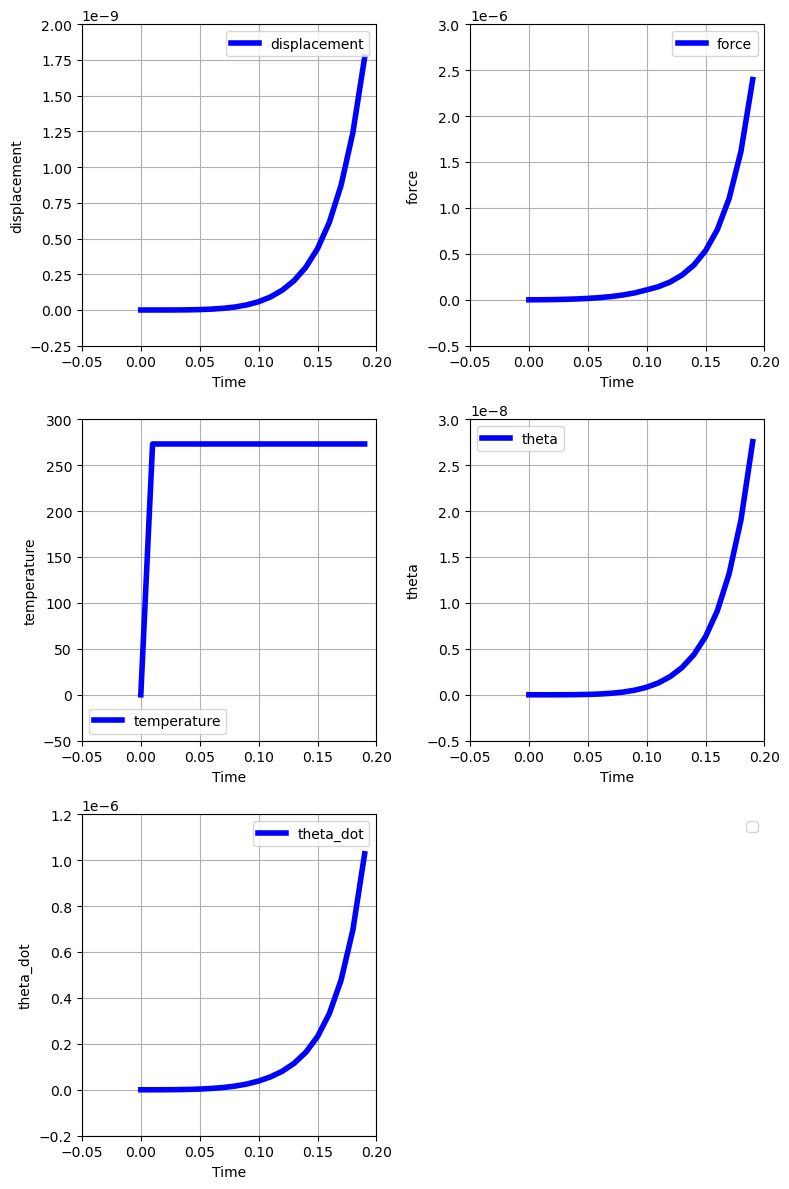

In [92]:
# Plot using matplotlib (if available)
try:
    import matplotlib.pyplot as plt
    import math

    # Use subplots for each QoI (excluding "time")
    qoi_keys = list(qoi_dict.keys())
    n_qoi = len(qoi_keys) - 1  # Exclude "time" 
    cols = 2 if n_qoi > 2 else n_qoi
    rows = math.ceil(n_qoi / cols)
    
    fig, axes = plt.subplots(rows, cols, figsize=(4*cols, 4*rows)) 
    if n_qoi == 1:
        axes = [axes]  # Make iterable if only one subplot

    for row in range(rows):
        for col in range(cols):
            idx = row * cols + col + 1
            ax = axes[row, col]
            key = qoi_keys[idx]
            time = qoi_dict[qoi_keys[0]][:20]
            data = qoi_dict[key][:20]
            if idx < n_qoi:
                ax.plot(time, data, label = key, color = 'blue', linewidth = 4)
                ax.set_ylabel(key)
                ax.set_xlabel("Time")
                ax.grid(True)
                ax.legend()
                n = len(ax.get_xticks())
                ninterval = n//10
                if ninterval == 0:
                    ninterval = 1
                ax.set_xticks(ax.get_xticks()[::ninterval])
                ax.set_yticks(ax.get_yticks()[::ninterval])
            else:
                ax.axis('off')

    plt.legend()
    plt.tight_layout()
    plt.show()
except ImportError:
    print("matplotlib is not installed. Install it to see plots.")